# Hough Line Transform

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In [1]:
import numpy as np
% matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
import cv2
import numpy as np
 
img = cv2.imread('./data/MODEL.jpg',0)
size = np.size(img)

In [3]:
import cv2 as cv

def hough(filename):
    # Loads an image
    src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    dst = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    plt.figure()
    plt.title("Source")
    imshow( src)
    plt.figure()
    plt.title("Detected Lines (in red) - Standard Hough Line Transform")
    imshow( cdst)
    plt.figure()
    plt.title("Detected Lines (in red) - Probabilistic Line Transform")
    imshow(cdstP)
    
    return 0


<IPython.core.display.Javascript object>


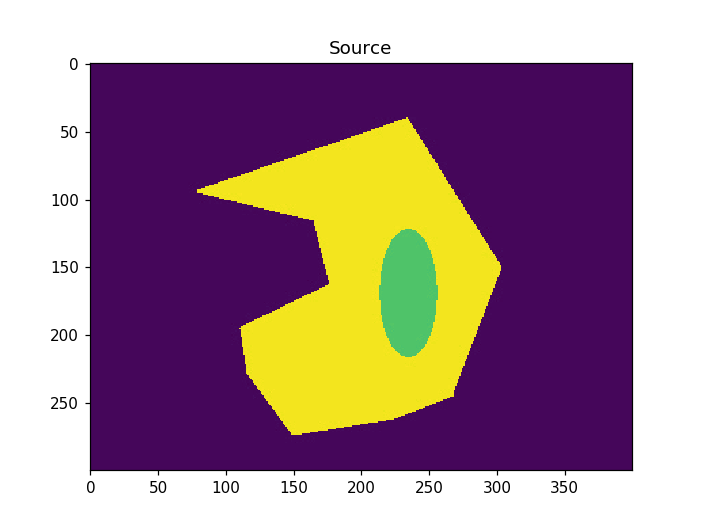

<IPython.core.display.Javascript object>


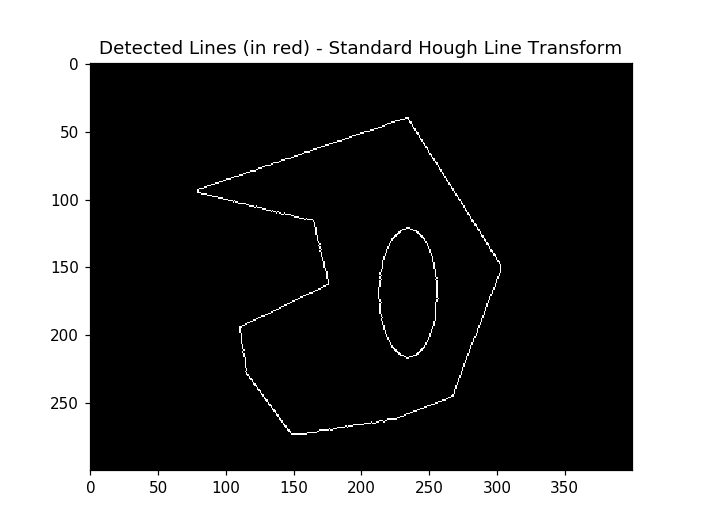

<IPython.core.display.Javascript object>


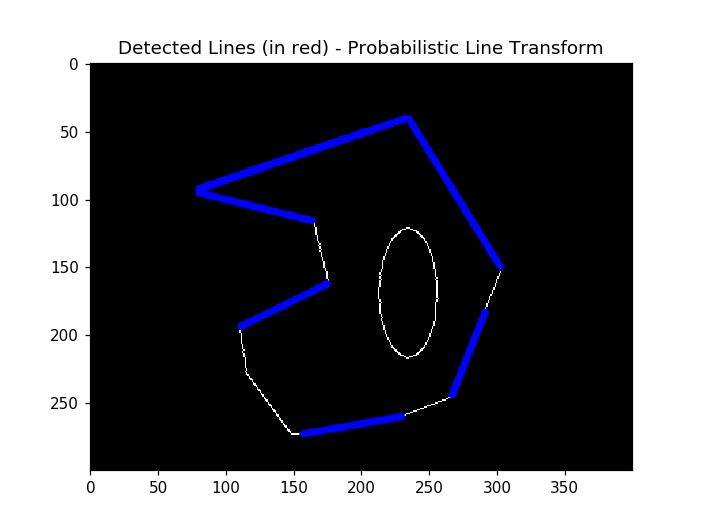

0

In [4]:
hough('./data/MODEL.jpg')